# Control Chart

In [1]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("RotorHistoricalData.csv")

In [3]:
df['Salto de Lâmina'] = (df['Salto de Lâmina'].str.replace(',','.'))
df

,Rotor,Instrumento,Operador,Salto de Lâmina
0,1,1,1,31.08
1,2,1,2,30.85
2,3,1,3,31.08
3,4,1,1,30.86
4,5,1,2,30.87
5,6,1,3,31.05
6,7,1,1,31.06
7,8,1,2,31.08
8,9,1,3,31.10
9,10,1,1,31.15


In [4]:
dados = df['Salto de Lâmina']

In [5]:
dados = dados.replace('3','1')
dados

0     31.08
1     30.85
2     31.08
3     30.86
4     30.87
5     31.05
6     31.06
7     31.08
8     31.10
9     31.15
10    30.94
11    30.90
12    31.10
13    30.83
14    31.05
15    31.16
16    30.95
17    30.75
18    30.88
19    30.87
20    30.83
21    30.78
22    30.70
23    30.80
24    31.15
25    30.80
26    30.85
27    30.90
28    30.83
29    30.90
Name: Salto de Lâmina, dtype: object

In [6]:
df['Salto de Lâmina'].median()

30.9

In [7]:
df['Salto de Lâmina'] = df['Salto de Lâmina'].astype(float)

In [8]:
x = np.split(df['Salto de Lâmina'].values,3)
x

[array([31.08, 30.85, 31.08, 30.86, 30.87, 31.05, 31.06, 31.08, 31.1 ,
        31.15]),
 array([30.94, 30.9 , 31.1 , 30.83, 31.05, 31.16, 30.95, 30.75, 30.88,
        30.87]),
 array([30.83, 30.78, 30.7 , 30.8 , 31.15, 30.8 , 30.85, 30.9 , 30.83,
        30.9 ])]

In [9]:
amostra1 = []
amostra2 = []
amostra3 = []
amostra4 = []
amostra5 = []
amostra6 = []
amostra7 = []
amostra8 = []
amostra9 = []
amostra10 = []

for c in range(0,3):
    amostra1.append(x[c][0])
    amostra2.append(x[c][1])
    amostra3.append(x[c][2])
    amostra4.append(x[c][3])
    amostra5.append(x[c][4])
    amostra6.append(x[c][5])
    amostra7.append(x[c][6])
    amostra8.append(x[c][7])
    amostra9.append(x[c][8])
    amostra10.append(x[c][9])

medias = []
medias.append(sum(amostra1)/3)
medias.append(sum(amostra2)/3)
medias.append(sum(amostra3)/3)
medias.append(sum(amostra4)/3)
medias.append(sum(amostra5)/3)
medias.append(sum(amostra6)/3)
medias.append(sum(amostra7)/3)
medias.append(sum(amostra8)/3)
medias.append(sum(amostra9)/3)
medias.append(sum(amostra10)/3)

amplitudes = []
amplitudes.append(max(amostra1) - min(amostra1))
amplitudes.append(max(amostra2) - min(amostra2))
amplitudes.append(max(amostra3) - min(amostra3))
amplitudes.append(max(amostra4) - min(amostra4))
amplitudes.append(max(amostra5) - min(amostra5))
amplitudes.append(max(amostra6) - min(amostra6))
amplitudes.append(max(amostra7) - min(amostra7))
amplitudes.append(max(amostra8) - min(amostra8))
amplitudes.append(max(amostra9) - min(amostra9))
amplitudes.append(max(amostra10) - min(amostra10))

In [10]:
x_barra = sum(medias)/10
r = sum(amplitudes)/10
n = 3

In [11]:
x_barra, r

(30.938333333333333, 0.2559999999999992)

In [12]:
o = r/1.693

In [13]:
from math import sqrt
lsc = x_barra + ((3*o)/sqrt(n))
lic = x_barra - ((3*o)/sqrt(n))

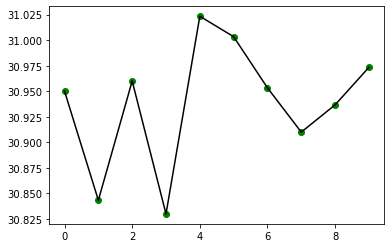

In [14]:
import matplotlib
plt.plot(np.arange(0,10),medias,'go')
plt.plot(np.arange(0,10),medias,'k')

Text(0.5, 1.0, 'Limite de Controle da Média (3o)')

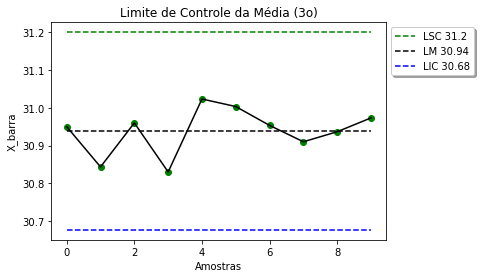

In [15]:
fig, ax = plt.subplots() 

plt.plot(np.arange(0,10),medias,'go')
plt.plot(np.arange(0,10),medias,'k')

ax.set_ylabel('X_barra')
ax.set_xlabel('Amostras')

plt.plot([lsc]*10, 'g--', label=f'LSC {round(lsc,2)}')
plt.plot([x_barra]*10, 'k--', label=f'LM {round(x_barra,2)}')
plt.plot([lic]*10, 'b--', label=f'LIC {round(lic,2)}')

ax.legend(loc='best', bbox_to_anchor=(1,1), shadow=True, ncol=1)

plt.title("Limite de Controle da Média (3o)")

In [16]:
lsc = r+(3*0.888)*o
lm = r
lic = r-(3*0.888)*o
if lic < 0:
    lic = 0

Text(0.5, 1.0, 'Limite de Controle da Amplitude (3o)')

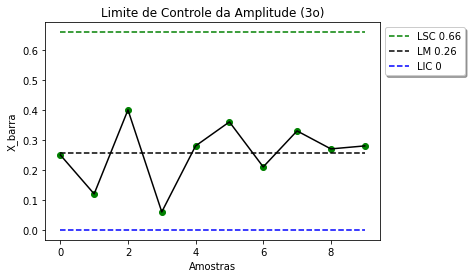

In [17]:
fig, ax = plt.subplots() 


plt.plot(np.arange(0,10),amplitudes,'go')
plt.plot(np.arange(0,10),amplitudes,'k')

ax.set_ylabel('X_barra')
ax.set_xlabel('Amostras')

plt.plot([lsc]*10, 'g--', label=f'LSC {round(lsc,2)}')
plt.plot([r]*10, 'k--', label=f'LM {round(lm,2)}')
plt.plot([lic]*10, 'b--', label=f'LIC {round(lic,2)}')

ax.legend(loc='best', bbox_to_anchor=(1,1), shadow=True, ncol=1)

plt.title("Limite de Controle da Amplitude (3o)")

In [19]:
new = pd.read_csv("RotorNewData.csv")

In [20]:
new = new['Salto de Lâmina'].str.replace(',','.').astype(float)

In [21]:
dados = df['Salto de Lâmina'].sort_values()

In [22]:
#Definindo os intervalos
minimo = dados.min()
maximo = dados.max()

#Número de classes
n = len(dados)
i = round(1+3.3*np.log10(n))

AA = round(maximo - minimo,2)
h = round((AA/i),1)
h=0.1

intervalos = np.arange(minimo,maximo+0.1,step=h)
intervalos

array([30.7, 30.8, 30.9, 31. , 31.1, 31.2])

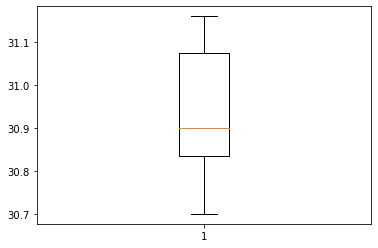

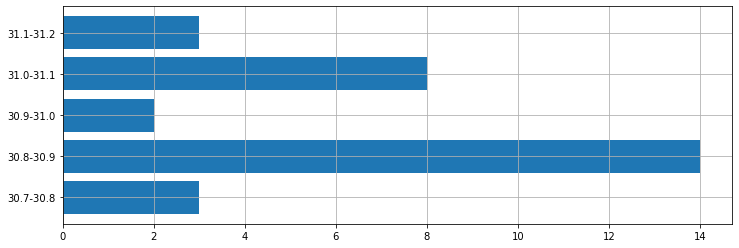

In [23]:
# Construindo o Boxplot e Histograma
def salto(dados):
    lista_intervalos = []
    for i in range(len(intervalos)-1):
        lista_intervalos.append(0)
    
    for c in range(len(lista_intervalos)):
        for i in range(n):
                if dados[i] >= intervalos[c] and dados[i] < intervalos[c+1]:
                    lista_intervalos[c] +=1
                    
    lista_classes = []
    for i in range(len(lista_intervalos)):
        lista_classes.append(str(round(intervalos[i],2)) + '-' + str(round(intervalos[i+1],2)))
        
    fig, ax = plt.subplots(figsize=(12,4))
    ax.grid(zorder=0)
    plt.barh(lista_classes, lista_intervalos)
     
plt.boxplot(dados,vert=True)

salto(dados)

Text(0.5, 1.0, 'Limite de Controle da Média (3o)')

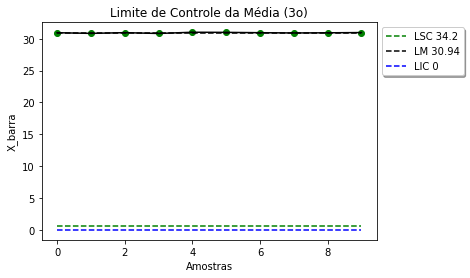

In [24]:
fig, ax = plt.subplots() 

plt.plot(np.arange(0,10),medias,'go')
plt.plot(np.arange(0,10),medias,'k')

ax.set_ylabel('X_barra')
ax.set_xlabel('Amostras')

plt.plot([lsc]*10, 'g--', label=f'LSC {34.2}')
plt.plot([x_barra]*10, 'k--', label=f'LM {round(x_barra,2)}')
plt.plot([lic]*10, 'b--', label=f'LIC {round(lic,2)}')

ax.legend(loc='best', bbox_to_anchor=(1,1), shadow=True, ncol=1)

plt.title("Limite de Controle da Média (3o)")